#For this assignment I have chosen to use LeNet - 5 and AlexNet CNN algorithms on the MNIST dataset. After initial research, I have discovered that there are many different CNN-based algorithms. [Different types of CNN models](https://iq.opengenus.org/different-types-of-cnn-models/). To be more precise, this website listed 22 different CNN algorithms. Personally, as a beginner in the Data Science world, I found this a bit overwhelming and it was challenging to choose the two from this list. My choice was guided by the availability of the resources for each of the models and my understanding of it, hence the choice for these two. 
#Keras is a deep learning API that is written in Python and contains different datasets that are readily available for use with easy access. [MNIST dataset](https://) The MNIST dataset contains 60 000 grayscale images with 10 000 test sets. 
#LeNet-5 is one of the earliest neural networks. It consists of five layers and it has been trained for classifation of grayscale images that are 32 x 32 pixel in size. AlexNet can process RGB images that are 227x227x3 in size and has eight layers. Both algorithms were run on GPU.

# LeNet - 5 on MNIST dataset
# Importing the libraries that will be used during this coursework


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# MNIST dataset are imported from the KERAS library. Neural networks tend to converge faster when data is normalized. That is the reason why the dataset is divided by 255.

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0


11501568/11490434 [==============================] - 0s 0us/step


#Visualizing some examples from the dataset

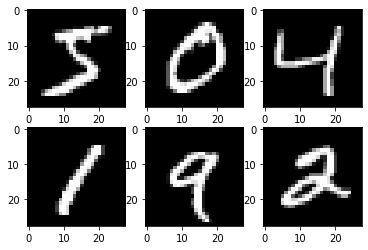

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))

In [ ]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

In [ ]:
val_x = train_x[:5000]
val_y = train_y[:5000]

# Implementation of the LeNet - 5 Network
# Sequential API from Keras was used for stacking layers

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

#Model summary

In [ ]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Compiling and buliding the model

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")


In [ ]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [ ]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

#Fitting the model

In [ ]:
history = lenet_5_model.fit(train_x, train_y, epochs=20, validation_data=(val_x, val_y), callbacks=[tensorboard_cb]).history

Epoch 1/20
1875/1875 [==============================] - 18s 3ms/step - loss: 0.2249 - accuracy: 0.9345 - val_loss: 0.0831 - val_accuracy: 0.9784
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0789 - accuracy: 0.9762 - val_loss: 0.0495 - val_accuracy: 0.9864
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0473 - val_accuracy: 0.9854
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9875 - val_loss: 0.0439 - val_accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0309 - val_accuracy: 0.9908
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0275 - val_accuracy: 0.9920
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0175 - val_accuracy

#The accuracy in validation data rises quickly after only few epochs. 

In [ ]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9877


[0.044907595962285995, 0.9876999855041504]

#After training, the accuracy of this dataset is 98.7%. 

#Training vs Validation Loss

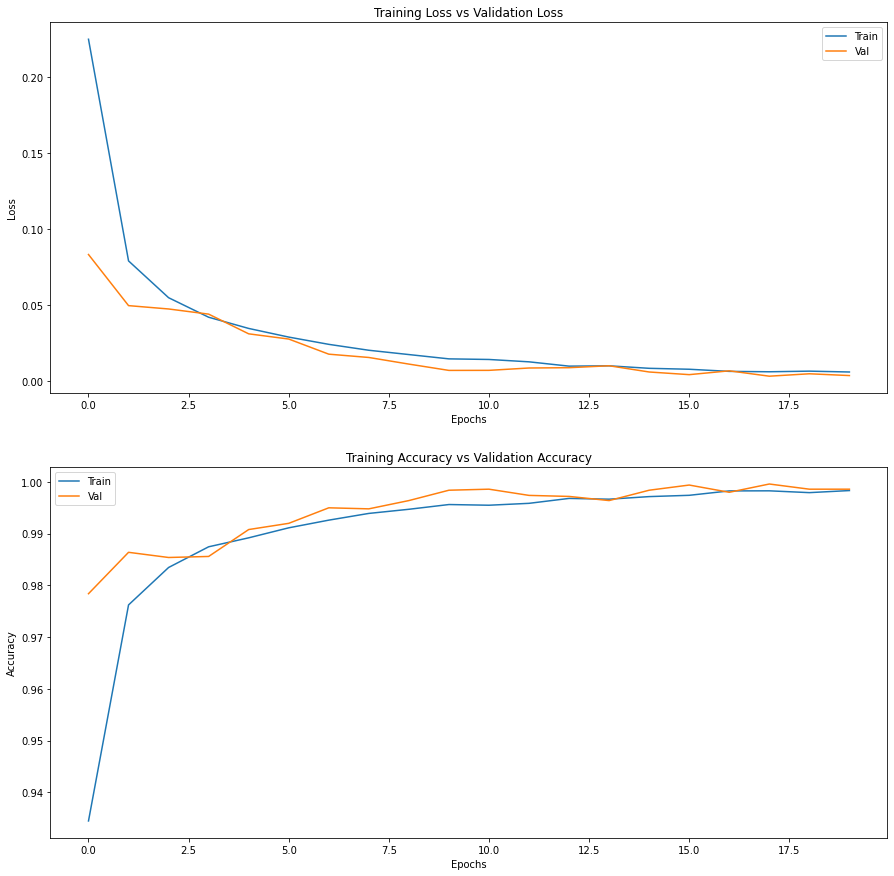

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history['loss'])
axs[0].plot(history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history['accuracy'])
axs[1].plot(history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

#AlexNet on MNIST dataset
#Importing the libraries that will be used during this coursework

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

#MNIST dataset will be imported from the KERAS library

In [ ]:
(train_x, train_y), (test_x, test_y)=tf.keras.datasets.mnist.load_data()
train_x = tf.pad(train_x, [[0, 0], [2,2], [2,2]])/255
test_x = tf.pad(test_x, [[0, 0], [2,2], [2,2]])/255
train_x = tf.expand_dims(train_x, axis=3, name=None)
test_x = tf.expand_dims(test_x, axis=3, name=None)
train_x = tf.repeat(train_x, 3, axis=3)
test_x = tf.repeat(test_x, 3, axis=3)
val_x = train_x[-2000:,:,:,:]
val_y = train_y[-2000:]
train_x = train_x[:-2000,:,:,:]
train_y = train_y[:-2000]

11501568/11490434 [==============================] - 0s 0us/step


#Visualising some of the images from the MNIST dataset (3 more than in LeNet example)

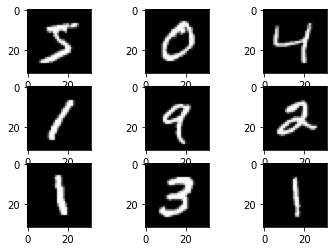

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))

In [ ]:
model = models.Sequential()

model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=train_x.shape[1:]))

model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

#Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#Fitting the model

In [ ]:
history = model.fit(train_x, train_y, batch_size=64, epochs=20, validation_data=(val_x, val_y))

Epoch 1/20
907/907 [==============================] - 106s 117ms/step - loss: 0.3564 - accuracy: 0.8816 - val_loss: 0.0798 - val_accuracy: 0.9815
Epoch 2/20
907/907 [==============================] - 106s 117ms/step - loss: 0.0953 - accuracy: 0.9761 - val_loss: 0.0833 - val_accuracy: 0.9800
Epoch 3/20
907/907 [==============================] - 106s 116ms/step - loss: 0.0676 - accuracy: 0.9828 - val_loss: 0.0746 - val_accuracy: 0.9840
Epoch 4/20
907/907 [==============================] - 105s 116ms/step - loss: 0.0629 - accuracy: 0.9847 - val_loss: 0.0484 - val_accuracy: 0.9900
Epoch 5/20
907/907 [==============================] - 105s 116ms/step - loss: 0.0524 - accuracy: 0.9870 - val_loss: 0.0564 - val_accuracy: 0.9880
Epoch 6/20
907/907 [==============================] - 105s 116ms/step - loss: 0.0438 - accuracy: 0.9892 - val_loss: 0.0512 - val_accuracy: 0.9910
Epoch 7/20
907/907 [==============================] - 106s 116ms/step - loss: 0.0392 - accuracy: 0.9900 - val_loss: 0.0388 -

#The accuracy in validation data rises quickly after only few epochs. 

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 7s 22ms/step - loss: 0.0713 - accuracy: 0.9896


[0.07125356793403625, 0.9896000027656555]

#After training, the accuracy of this dataset is 98.9%

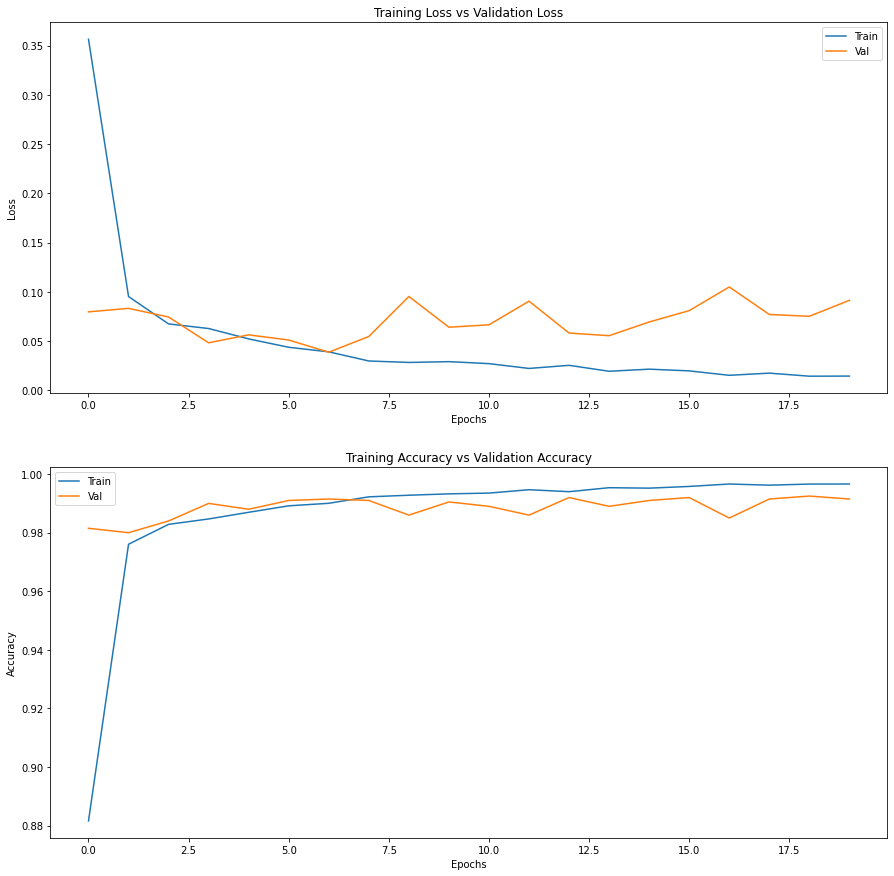

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

#Both algorithms were trained for 40 epochs and showed high testing accuracy. Training losses are also decreasing more consistently. However, it took more time for AlexNet to run through each of the epochs. Also validation losses were slightly higher than training losses on AlexNet. In LeNet - 5 these losses were almost equal after 10 epochs.
#I run algorithms on two separate colab notebooks. After analysis, I combined them in one colab notebook with "nbmerge" command in command prompt. 